In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ragnarok-sports/sports.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ufc=pd.read_csv('/kaggle/input/ragnarok-sports/sports.csv')

In [3]:
print(ufc.columns)

#Drops the null elements
ufc=ufc.dropna()

print("Shape of cleaned DataFrame:", ufc.shape)

Index(['event', 'date', 'location', 'r_fighter', 'b_fighter', 'status', 'r_kd',
       'b_kd', 'r_str', 'b_str', 'r_td', 'b_td', 'r_sub', 'b_sub',
       'weight_class', 'method', 'method_detailed', 'round', 'time'],
      dtype='object')
Shape of cleaned DataFrame: (3825, 19)


In [4]:
print(ufc.head())
print(ufc.info())

                                  event       date                location  \
2  UFC Fight Night: Ribas vs. Namajunas  3/23/2024  Las Vegas, Nevada, USA   
3  UFC Fight Night: Ribas vs. Namajunas  3/23/2024  Las Vegas, Nevada, USA   
4  UFC Fight Night: Ribas vs. Namajunas  3/23/2024  Las Vegas, Nevada, USA   
5  UFC Fight Night: Ribas vs. Namajunas  3/23/2024  Las Vegas, Nevada, USA   
7  UFC Fight Night: Ribas vs. Namajunas  3/23/2024  Las Vegas, Nevada, USA   

          r_fighter          b_fighter status  r_kd  b_kd  r_str  b_str  r_td  \
2  Edmen Shahbazyan          AJ Dobson    win   1.0   0.0   27.0   15.0   1.0   
3    Payton Talbott    Cameron Saaiman    win   1.0   0.0   79.0   31.0   0.0   
4     Youssef Zalal  Billy Quarantillo    win   0.0   0.0   33.0   10.0   2.0   
5  Fernando Padilla       Luis Pajuelo    win   1.0   0.0   34.0    5.0   0.0   
7      Julian Erosa      Ricardo Ramos    win   0.0   0.0    4.0    7.0   0.0   

   b_td  r_sub  b_sub   weight_class  method

In [5]:
#This is data cleaning of outliers for all other cases
#Method used here is Inter Quartile Range method (IQR)
#Quantiles are 0.25 to 0.75 including the end points


def remove_outliers_iqr(data,columns):
    for col in columns:
        Q1=data[col].quantile(0.25)
        Q2=data[col].quantile(0.75)
        IQR=Q2-Q1
        upper_bound=Q2+1.5*IQR
        lower_bound=Q1-1.5*IQR
        data_cleaned=data[(data[col]>=lower_bound) & (data[col]<=upper_bound)]
    return data_cleaned

cols_to_clean=['r_kd','b_kd','r_str','b_str','r_td','b_td']

ufc_cleaned=remove_outliers_iqr(ufc,cols_to_clean)

for col in cols_to_clean:
    print(len(ufc_cleaned[col])-len(ufc[col]))
    
print(ufc_cleaned.head())
print(ufc_cleaned.shape)

-175
-175
-175
-175
-175
-175
                                  event       date                location  \
2  UFC Fight Night: Ribas vs. Namajunas  3/23/2024  Las Vegas, Nevada, USA   
3  UFC Fight Night: Ribas vs. Namajunas  3/23/2024  Las Vegas, Nevada, USA   
4  UFC Fight Night: Ribas vs. Namajunas  3/23/2024  Las Vegas, Nevada, USA   
5  UFC Fight Night: Ribas vs. Namajunas  3/23/2024  Las Vegas, Nevada, USA   
7  UFC Fight Night: Ribas vs. Namajunas  3/23/2024  Las Vegas, Nevada, USA   

          r_fighter          b_fighter status  r_kd  b_kd  r_str  b_str  r_td  \
2  Edmen Shahbazyan          AJ Dobson    win   1.0   0.0   27.0   15.0   1.0   
3    Payton Talbott    Cameron Saaiman    win   1.0   0.0   79.0   31.0   0.0   
4     Youssef Zalal  Billy Quarantillo    win   0.0   0.0   33.0   10.0   2.0   
5  Fernando Padilla       Luis Pajuelo    win   1.0   0.0   34.0    5.0   0.0   
7      Julian Erosa      Ricardo Ramos    win   0.0   0.0    4.0    7.0   0.0   

   b_td  r_sub

In [6]:
#An important thing to notice here is that the data contains the outliers of submissions
#They have been incorporated because their removal gauranteed that red fighters were only submitors
#The above anomaly would be very misleading and would eventually lead to false outcomes
#This would also reduce the analysis aspect of data and vibrancy of analysis itself

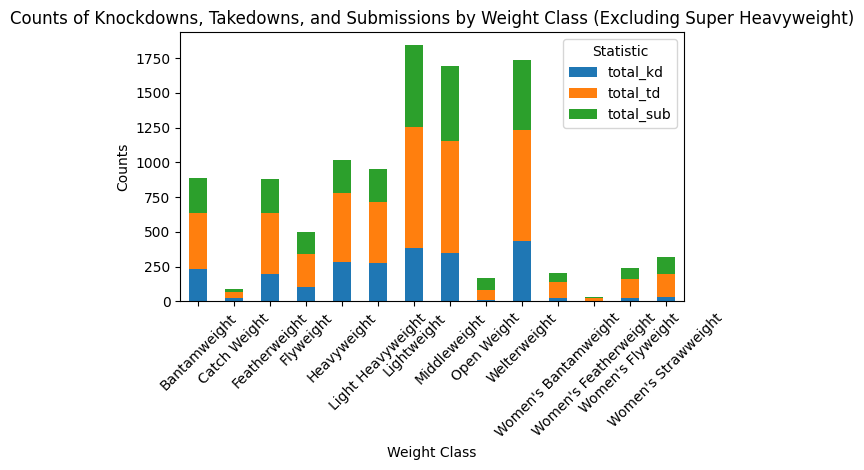

3

In [7]:

df_filtered = ufc[ufc['weight_class'] != 'Super Heavyweight']

# Group the data by weight class and calculate the sum of knockdowns, takedowns, and submissions
grouped_data = df_filtered.groupby('weight_class').agg({
    'r_kd': 'sum',
    'b_kd': 'sum',
    'r_td': 'sum',
    'b_td': 'sum',
    'r_sub': 'sum',
    'b_sub': 'sum'
}).reset_index()

# Calculate total knockdowns, takedowns, and submissions
grouped_data['total_kd'] = grouped_data['r_kd'] + grouped_data['b_kd']
grouped_data['total_td'] = grouped_data['r_td'] + grouped_data['b_td']
grouped_data['total_sub'] = grouped_data['r_sub'] + grouped_data['b_sub']

# Select relevant columns for plotting
plot_data = grouped_data[['weight_class', 'total_kd', 'total_td', 'total_sub']]

# Plotting
plot_data.set_index('weight_class').plot(kind='bar', stacked=True)
plt.title('Counts of Knockdowns, Takedowns, and Submissions by Weight Class (Excluding Super Heavyweight)')
plt.xlabel('Weight Class')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Statistic')
plt.tight_layout()
plt.show()
3

In [8]:
#This plot shows the deadliest and toughest weightclass is light heavyweight in men 
#The same in women is Women's Strawweight
#What is also visible from this is that the most strikes and knockdowns are secured via men
#Also indicates that fighters in the men divisions face more strikes than women's divisions

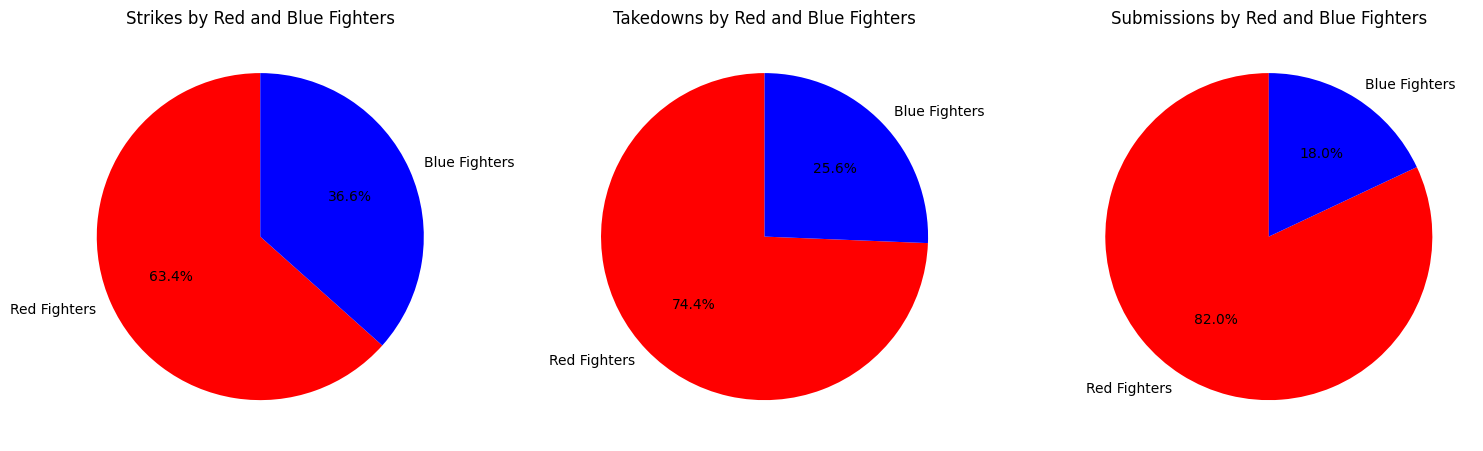

In [9]:

total_strikes_red = ufc_cleaned['r_str'].sum()
total_strikes_blue = ufc_cleaned['b_str'].sum()

total_takedowns_red = ufc_cleaned['r_td'].sum()
total_takedowns_blue = ufc_cleaned['b_td'].sum()

total_submissions_red = ufc_cleaned['r_sub'].sum()
total_submissions_blue = ufc_cleaned['b_sub'].sum()

# Create data for pie charts
labels = ['Red Fighters', 'Blue Fighters']
strike_counts = [total_strikes_red, total_strikes_blue]
takedown_counts = [total_takedowns_red, total_takedowns_blue]
submission_counts = [total_submissions_red, total_submissions_blue]

# Plotting pie charts for strikes, takedowns, and submissions
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Strikes pie chart
axs[0].pie(strike_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'blue'])
axs[0].set_title('Strikes by Red and Blue Fighters')

# Takedowns pie chart
axs[1].pie(takedown_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'blue'])
axs[1].set_title('Takedowns by Red and Blue Fighters')

# Submissions pie chart
axs[2].pie(submission_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'blue'])
axs[2].set_title('Submissions by Red and Blue Fighters')

plt.tight_layout()
plt.show()


In [10]:
#Above division clarifies that most wins were secured by the method of submission via red fighters
#This also implies the most popular striking style is grappling
#Takedowns also depend on grappling skills 
#Hence the better the striker is a grappler the more are the chances of him to win the matchup

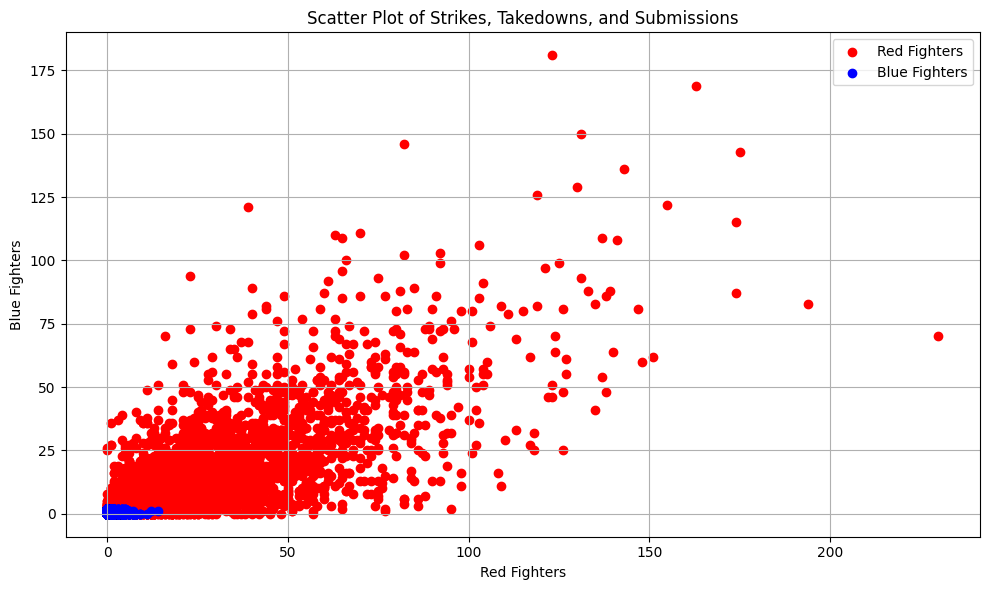

In [11]:

plt.figure(figsize=(10, 6))

# Scatter plot for strikes
plt.scatter(ufc_cleaned['r_str'], ufc_cleaned['b_str'], color='red', label='Red Fighters')
plt.scatter(ufc_cleaned['r_td'], ufc_cleaned['b_td'], color='blue', label='Blue Fighters')
plt.title('Scatter Plot of Strikes, Takedowns, and Submissions')
plt.xlabel('Red Fighters')
plt.ylabel('Blue Fighters')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
#This scatterplot clearly shows that the red fighters are well rounded in all the aspects 
#Of the game and that is why they win over the blue fighters
#Another interesting observation is that the region where both blue and red points
#Are present are the fights where the status is draw

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


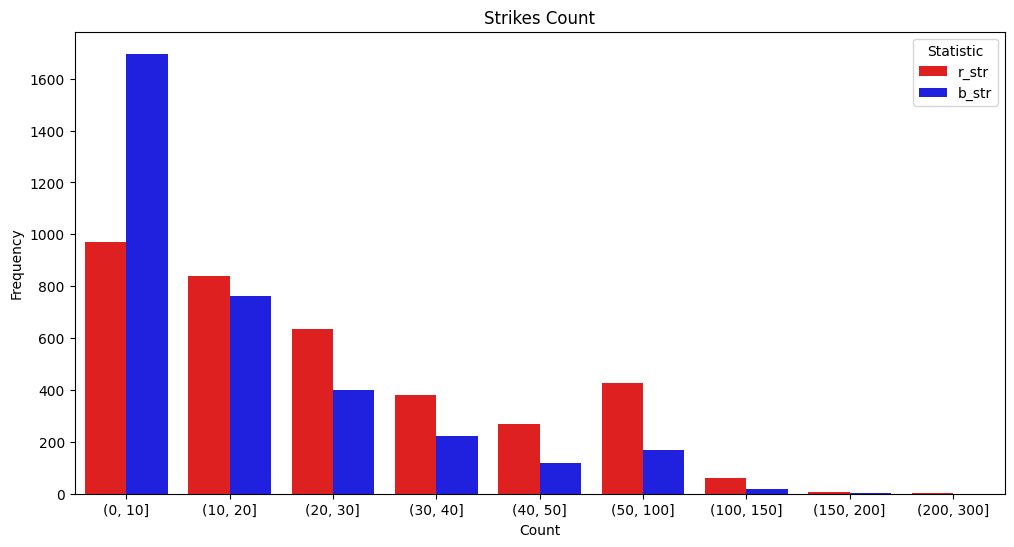

In [13]:

# Melt the DataFrame to have 'strikes', 'takedowns', and 'submissions' in a single column
df_melted = ufc_cleaned.melt(value_vars=['r_str', 'b_str', 'r_td', 'b_td', 'r_sub', 'b_sub'],
                    id_vars='weight_class',
                    var_name='Statistic',
                    value_name='Count')

# Define intervals
intervals = [0, 10, 20, 30, 40, 50, 100, 150, 200, 300]  # Example intervals

# Create a new column to store the bins
df_melted['Bin'] = pd.cut(df_melted['Count'], bins=intervals)

# Plotting count plots with adjusted intervals
plt.figure(figsize=(12, 6))
sns.countplot(x='Bin', hue='Statistic', data=df_melted[df_melted['Statistic'].str.contains('str')],
              palette=['red', 'blue'])
plt.title('Strikes Count')
plt.xlabel('Count')
plt.ylabel('Frequency')

plt.show()


In [14]:
#Above graph shows that the division of blue fighters is more inconsistent than red fighters
#This is because most of blue fighters land strikes between 0-100 and very less from 200-300
#This is also supported by the fact that take downs by blue fighters are far less than red

In [15]:

method_counts = ufc_cleaned['method_detailed'].value_counts()

# Create a DataFrame with method and frequency columns
method_freq_df = pd.DataFrame({'Method': method_counts.index, 'Frequency': method_counts.values})

# Convert the DataFrame to a list of lists for tabulate
method_freq_table = method_freq_df.values.tolist()

# Add header to the table
method_freq_table.insert(0, ['Method', 'Frequency'])

# Print the table using tabulate
print(tabulate(method_freq_table, headers="firstrow", tablefmt="grid"))


NameError: name 'tabulate' is not defined

In [ ]:
#This table reveals the most rare tko types
#Them being shoulder choke,head butts , head locks and omoplata
#This also suggests for their difficulty to apply in the ongoing professional matches 
#Following pie chart reflects on the most common methods

In [ ]:

method_counts = ufc_cleaned['method_detailed'].value_counts()

# Calculate percentages
total_methods = method_counts.sum()
method_freq_df = pd.DataFrame({'Method': method_counts.index, 'Frequency': method_counts.values})
method_freq_df['Percentage'] = method_freq_df['Frequency'] / total_methods * 100

# Filter methods with percentage less than 2.8%
method_freq_df_filtered = method_freq_df[method_freq_df['Percentage'] >= 2.8]

# Plotting pie chart for filtered methods with names
plt.figure(figsize=(10, 6))
plt.pie(method_freq_df_filtered['Frequency'], labels=method_freq_df_filtered['Method'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Method Distribution (Percentage >= 2.8%)')
plt.show()


In [ ]:
#This analysis shows that amongst the tko's the most useful method to finish a fight is via 
#Punches
#Punches here refer to multiple combinations of strikes well landed in succession
#Punch is the second which refers to a clear one knockout punch also called death blows ;)
#Rear naked choke is the best chance in win via submission followed by infamous guillotine choke

In [ ]:
# Aggregate the data to count the number of wins for each combination of rounds and wins
rounds_wins_count = ufc_cleaned.groupby(['round', 'status']).size().unstack(fill_value=0)

# Plotting heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(rounds_wins_count, cmap='Blues', annot=True, fmt='d', linewidths=.5)
plt.title('Number of Wins by Number of Rounds')
plt.xlabel('Winner')
plt.ylabel('Number of Rounds')
plt.show()

In [ ]:
#This heatmap indicates that optimal round to win a match is the first one
#As the rounds increase the chances of winning the match decrease indicating an inverse proportion 
#This also suggests that with advancing round the fighter's capabilities reduce drastically due to fatigue
#Most significant jump occurs between 3rd and 4th rounds where the drop is in 100's and 1st and 2nd
#The chances between 4th and 5th rounds are almost the same and don't vary much

In [ ]:

rounds_data = ufc_cleaned.groupby('round').agg({'r_str': 'sum', 'b_str': 'sum', 
                                               'r_td': 'sum', 'b_td': 'sum', 
                                               'r_sub': 'sum', 'b_sub': 'sum'}).reset_index()

# Plotting line graph
plt.figure(figsize=(10, 6))
plt.plot(rounds_data['round'], rounds_data['r_str'], marker='o', label='Red Strikes', color='red')
plt.plot(rounds_data['round'], rounds_data['b_str'], marker='o', label='Blue Strikes', color='blue')
plt.plot(rounds_data['round'], rounds_data['r_td'], marker='o', label='Red Takedowns', color='green')
plt.plot(rounds_data['round'], rounds_data['b_td'], marker='o', label='Blue Takedowns', color='orange')
plt.plot(rounds_data['round'], rounds_data['r_sub'], marker='o', label='Red Submissions', color='purple')
plt.plot(rounds_data['round'], rounds_data['b_sub'], marker='o', label='Blue Submissions', color='brown')

plt.title('Strikes, Takedowns, and Submissions by Round')
plt.xlabel('Round')
plt.ylabel('Count')
plt.xticks(rounds_data['round'])
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#This line graph indicates the optimal chances of winning are in round 1 with strikes 
#Interestingly the chances of winning by strikes is always greater than via takedowns and then via sub
#And the chances of winning by submission almost remain same throughout the fight
#This also implies that advancing rounds affect the striking and takedown abilities more than the ground game
#This also suggest to surely win a fight a fighter must be a good grappler and hence know to endure
#Above graph depicts winning figters rely more on strikes in initial rounds but as fight 
#Progresses they tend to adopt almost all styles to maximise their chances to win
#Hence every fight starts on feet but ends on ground